### Barplot: Reason for ownership of business
- Continuing a family business

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

owner = pd.read_json(r'https://api.census.gov/data/2018/abscbo?get=NAME,OWNPDEMP,QDESC,OWNCHAR,OWNCHAR_LABEL,OWNER_SEX_LABEL,OWNER_RACE_LABEL&for=us&NAICS2017=00&key=bccfff37a66ca0c564d5d5d80d0236771b334f9b')
owner.columns = owner.iloc[0]
owner =  owner.iloc[1:].reset_index(drop=True)
owner['OWNPDEMP'] = owner['OWNPDEMP'].astype(int)

familyowned = owner[['OWNPDEMP','OWNCHAR']]
familyowned = familyowned[familyowned['OWNCHAR'].isin(['OR1N','OR1S','OR1V'])]
labelmap = {'OR1N':'Not important','OR1S':'Somewhat important','OR1V':'Very important'}
familyowned['Label'] = familyowned['OWNCHAR'].map(lambda x: labelmap.get(x))
familyowned

,OWNPDEMP,OWNCHAR,Label
82,2717912,OR1N,Not important
83,602435,OR1S,Somewhat important
84,752938,OR1V,Very important


Text(0, 0.5, 'Number of Business Owners (millions)')

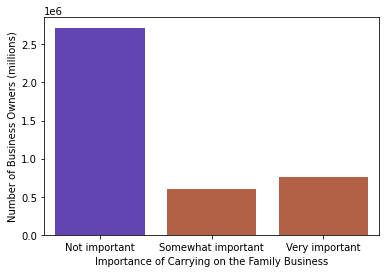

In [3]:
ax = sns.barplot(x=familyowned['Label'], y=familyowned['OWNPDEMP'], palette=['#5932C4', '#C45932', '#C45932'], data=familyowned)
ax.set_xlabel('Importance of Carrying on the Family Business', size=10)
ax.set_ylabel('Number of Business Owners (millions)', size=10) 